<a href="https://colab.research.google.com/github/agustinpenacamprubi/hello-world/blob/master/Agustin_Pena_Entregable_Modulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

### Get Data

In [ ]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
76,6.8,2.8,4.8,1.4,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor


In [ ]:
#Information of the dataset
#one column is categorical (target), the rest are numerical
#Data has 150 records, 4 independent variables, 1 dependent variable
#Data has no nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.sort_values(["target", "sepal length","sepal width" ]).head()

,sepal length,sepal width,petal length,petal width,target
13,4.3,3.0,1.1,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa


In [ ]:
#to see the dups manually - with ID conc column
#See dups with concatenated column
#cols = data.columns
#data['conc'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

Removing duplicates

In [ ]:
#Estudio los dups con pandas
data[data.duplicated()]

,sepal length,sepal width,petal length,petal width,target
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
#As shown above there are 3 dups
data.duplicated().sum()

3

In [ ]:
#See if the dataset has dups
data_wo_dups = data.drop_duplicates(keep='first')

In [ ]:
data_wo_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  147 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  147 non-null    float64
 3   petal width   147 non-null    float64
 4   target        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
#Para seguir con el codigo de una manera más sencilla, cambio el nombre al dataframe
data=data_wo_dups

Separamos las variables independientes de las dependientes

In [ ]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
85            6.0          3.4           4.5          1.6
47            4.6          3.2           1.4          0.2
139           6.9          3.1           5.4          2.1
90            5.5          2.6           4.4          1.2
91            6.1          3.0           4.6          1.4

 Target 

121    Iris-virginica
133    Iris-virginica
146    Iris-virginica
48        Iris-setosa
149    Iris-virginica
Name: target, dtype: object


### Visualize Data

In [ ]:
data["target"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: target, dtype: int64

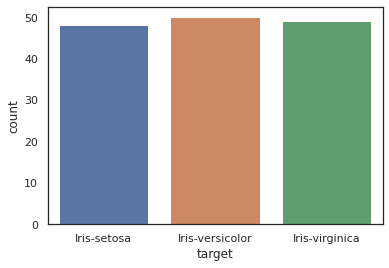

In [ ]:
sns.countplot(x='target', data=data, )
plt.show()

In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: ylabel='sepal length'>

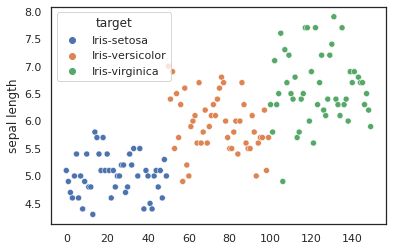

In [ ]:
#Por el orden que se recogieron datos (index) se ve como primero se recogio setos, luego versicolor y por ultimo virginica
sns.scatterplot(data=data, x=data.index,y="sepal length",hue="target")


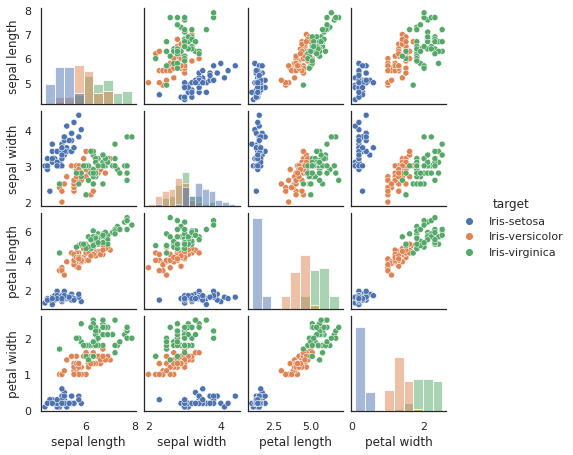

In [ ]:
sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor y Virginica son muy similares, sera muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!! 

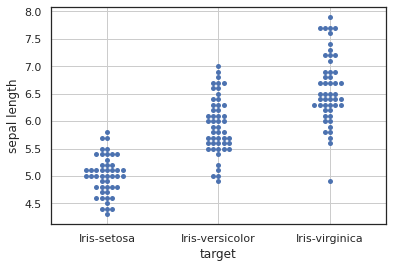

In [ ]:
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()


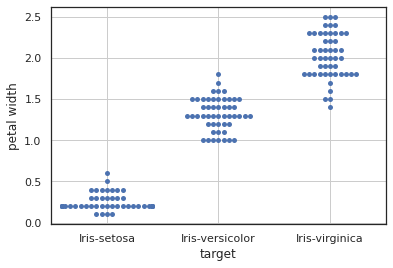

In [ ]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

Removing outliers

In [ ]:
data.shape

(147, 5)

In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  147 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  147 non-null    float64
 3   petal width   147 non-null    float64
 4   target        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
def flag_outliers(row,upper_lmt,lower_lmt):
  if row>upper_lmt | row<lower_lmt:
    return 1
  else: 
    return 0

In [ ]:
cols=['sepal length', 'sepal width', 'petal length', 'petal width']
data_iris=data.rename(columns={'target': 'Species'})



species=data_iris["Species"].unique()


end_df = pd.DataFrame ()


for elem in species:  
  df_work=data_iris[data_iris["Species"]==elem]
  

  specie_df = pd.DataFrame()
  outlayers_specie_df = pd.DataFrame()
  for col in df_work.columns:
    if (col == 'Species'):
      continue


    calculated_column = df_work[col]
    upper_lmt = calculated_column.mean() + (3 * calculated_column.std()) 
    lower_lmt=  calculated_column.mean() - (3 * calculated_column.std())

    ##removing upper limits
    specie_df[f'New_{col}'] = calculated_column[(df_work[col]<=upper_lmt) & (df_work[col]>=lower_lmt)]
    outlayers_specie_df[f'New_{col}'] = calculated_column[(df_work[col]>=upper_lmt) | (df_work[col]<=lower_lmt)]
    #removing lower limits
    #df_work[col] = df_work[df_work[col]>=lower_lmt]
  
  specie_df["Species"] = elem
  outlayers_specie_df["Species"] = elem
  end_df = pd.concat([specie_df,end_df])
print (end_df)



  
 


     New_sepal length  New_sepal width  New_petal length  New_petal width  \
100               6.3              3.3               6.0              2.5   
101               5.8              2.7               5.1              1.9   
102               7.1              3.0               5.9              2.1   
103               6.3              2.9               5.6              1.8   
104               6.5              3.0               5.8              2.2   
..                ...              ...               ...              ...   
45                4.8              3.0               1.4              0.3   
46                5.1              3.8               1.6              0.2   
47                4.6              3.2               1.4              0.2   
48                5.3              3.7               1.5              0.2   
49                5.0              3.3               1.4              0.2   

            Species  
100  Iris-virginica  
101  Iris-virginica  
102  Iris

In [ ]:
#Vemos que hemos eliminado 1 outlier - pasamos de 147 observaciones a 146 observaciones
data_iris.shape

(146, 5)

In [ ]:
#Le vuelvo a asignar el nombre data al df
data= data_iris

In [ ]:
#Vemos la info del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  146 non-null    float64
 1   sepal width   146 non-null    float64
 2   petal length  146 non-null    float64
 3   petal width   146 non-null    float64
 4   Species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


### Feature Scaling

Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width, 
por lo tando recomiendo escalar los valores.
de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

# Celda para completar código

In [ ]:

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np

#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS

 
# create StandardScaler() object
scaler = StandardScaler()

data_X= data[cols]


data_X.head()
# fit() & transform()
scaler.fit(data_X)
iris_scaled_X = scaler.transform(data_X)

# transform() returns ndarray -> convert to dataframe
iris_df_scaled_X = pd.DataFrame(data=iris_scaled_X)



iris_df_scaled_X.head()

# GENERAR UN VECTOR CON LOS VALORES DE X ESCALADOS LLAMADO X_scaled_array
X_scaled_array=iris_df_scaled_X




#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS
X_scaled_array.shape


flowers = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}
data_cat = data['Species'].map(flowers)
#print(data_cat)

#Juntar variables X e y
data_std_scaled= pd.merge(X_scaled_array, data_cat, left_index=True, right_index=True)
data_std_scaled.columns =['sepal length', 'sepal width', 'petal length', 'petal width', 'Species']


In [ ]:
data_std_scaled

,sepal length,sepal width,petal length,petal width,Species
0,-0.922867,1.027124,-1.368870,-1.339636,1
1,-1.164985,-0.121116,-1.368870,-1.339636,1
2,-1.407103,0.338180,-1.426020,-1.339636,1
3,-1.528162,0.108532,-1.311720,-1.339636,1
4,-1.043926,1.256773,-1.368870,-1.339636,1
...,...,...,...,...,...
140,1.014076,0.567828,1.088598,1.701945,3
141,1.014076,-0.121116,0.802846,1.437459,3
143,0.771958,-0.121116,0.802846,1.040731,3
144,0.408781,0.797476,0.917147,1.437459,3


In [ ]:
#la verdad no entiendo porque tiene 142 records si tanto X scaled como y tenian 146...
data_std_scaled.shape

(142, 5)

### Silhouette score & Elbow Method

un valor cercano a +1 indica que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra se encuentra en el límite de decisión entre dos conglomerados vecinos o muy cerca del mismo, y los valores negativos indican que es posible que esas muestras se hayan asignado al conglomerado equivocado.

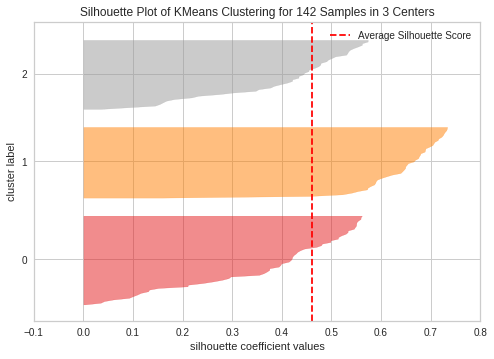

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 142 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick
X_scaled=data_std_scaled


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


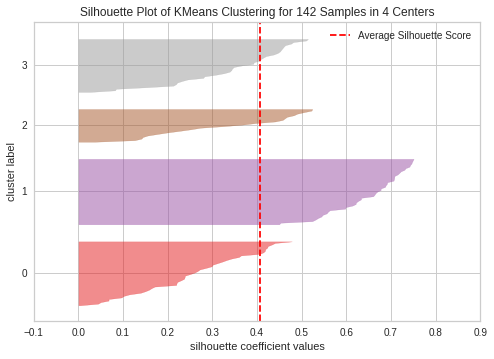

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 142 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


Se puede observar que con 3 cluster se obtiene un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo tanto se recomienda entrenar un modelo de clustering con 3 clusters

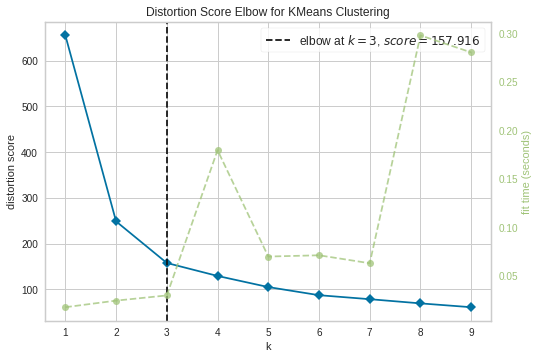

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

Observamos por el metodo de ELBOW que tenemos que utilizar un K=3 es decir 3 clusters.

### K-Means

Intente agrupar los datos en 4D y ver si puede reproducir los clústeres reales. Es decir, imagine que no tenemos las etiquetas de especies en estos datos y queremos dividir las flores en especies. podría establecer un número arbitrario de grupos 
e intentar dividirlos en grupos similares. Sabemos que hay 3 especies, así que encontremos 3 especies y veamos 
si las predicciones para cada punto coinciden con la etiqueta en y, por otro lado sabemos que por el metodo de las siluetas y elbow, la cantidad de clusters recomendada es 3

# Celda para completar código

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nclusters = 3 
seed = 0

#DESARROLLE AQUI EL METODO DE KMeans utilizando la libreia KMeans.

 
data_features= data.drop(labels="Species", axis=1)

X = data_features
y = data["Species"]

kmeans = KMeans(n_clusters=3,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
kmeans.fit(X)     

y_kmeans = kmeans.fit_predict(X)


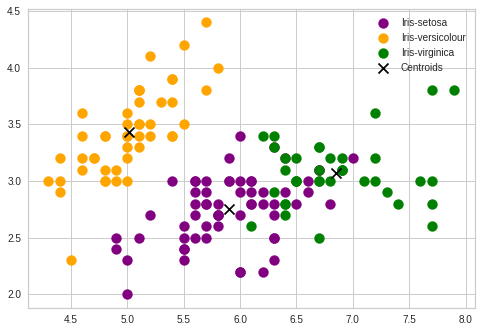

In [ ]:
# Visualising the clusters
cols = data.columns
plt.scatter(X.loc[y_kmeans == 0, cols[0]],
            X.loc[y_kmeans == 0, cols[1]],
            s=100, c='purple',
            label='Iris-setosa')
plt.scatter(X.loc[y_kmeans == 1, cols[0]],
            X.loc[y_kmeans == 1, cols[1]],
            s=100, c='orange',
            label='Iris-versicolour')
plt.scatter(X.loc[y_kmeans == 2, cols[0]],
            X.loc[y_kmeans == 2, cols[1]],
            s=100, c='green',
            label='Iris-virginica')
  
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=100, c='black',
            label='Centroids',
            marker="x")
  
plt.legend()

In [ ]:
#ACCURACY OF THE MODEL
pd.crosstab(y, y_kmeans)

col_0,0,1,2
Species,,,
Iris-setosa,0,47,0
Iris-versicolor,48,0,2
Iris-virginica,13,0,36


Al ser un algoritmo NO supervisado no tendriamos que hacer este paso ya que en teoria no disponemos de la información

- Setosa lo clusteriza a la perfección
- Los otros dos no


### Principal Component Analysis (PCA)


Si tiene muchas característics, puede ser útil reducir algunas características, para evitar la maldición de la dimensionalidad (es decir, necesitar exponencialmente más datos para hacer predicciones precisas a medida que crece la cantidad de características). 
Puede hacer esto con el análisis de componentes principales (PCA), que reasigna los datos a un nuevo sistema de coordenadas (más pequeño) que trata de dar cuenta de la mayor información posible. puedes *también* usar PCA para visualizar los datos al reducir las # características a 2 dimensiones y hacer un diagrama de dispersión.

En este caso recomiendo usar PCA para poder visualizar los datos, ya entrenamos el modelo de K-means y tenemos los clusters identificados, ahora transformemos de 4D a 2D las caracteristicas. para solo visualizarlas en un grafico, y poder observar los CLUSTERS.

# Celda para completar código

In [ ]:
from typing_extensions import dataclass_transform
import seaborn as sns
from sklearn.decomposition import PCA

ndimensions = 2

cols= ['sepal length', 'sepal width', 'petal length', 'petal width', 'Species']
data.head()

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = data.loc[:, features].values
y = data.loc[:,['Species']].values
df_y = pd.DataFrame(data=y, columns=["y_target"])

x = StandardScaler().fit_transform(X)
pd.DataFrame(data = X, columns = features).head()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.merge(principalDf, df_y, left_index=True,right_index=True)

#Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, puede utilizar la variable ndimensio
#print(X_pca.sample(10))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)





 explained_variance
[0.7260685  0.23155826]


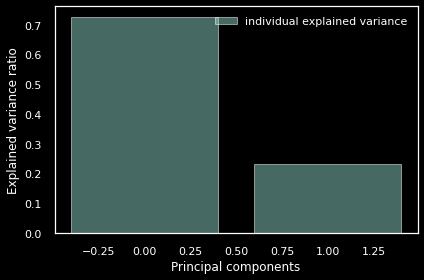

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Tenemosnuevas coordenadas 2D para cada punto de datos. 
En este punto, si no tiene datos etiquetados, puede agregar los ID de clúster de k-means a esta tabla y hacer un 
diagrama de dispersión de colores. en realidad tenemos etiquetas para los puntos de datos, pero imaginemos que 
no las tenemos, y usemos las etiquetas pronosticadas para ver cómo se ven las predicciones. 



In [ ]:
data

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = data
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['Species'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

### Grafica de Dispersion (TARGET)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados a la etiqueta o target, ya que partimos de un dataset etiquetado.

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Grafica de Dispersion (CLUSTERS)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados al CLUSTER obtenido luego de aplicar K-MEANS, como se puede comparar con los datos etiquetados, los clusters se ASEMEJAN BASTANTE.

Un mecanismo asi puede ser utilizado para etiquetar flores, cuando no tenemos la etiqueta de antemano, incluso nos puede servir para generar clasificaciones mas especificas.

Como aclaramos desde el principio, la division entre Versicolor y Virginica es muy fina, y en ambos graficos es costoso encontrar una division clara.

La division real, basada en los datos etiquetados de antemano, es por una linea VERTICAL al medio del conjunto de datos, en cambio segun K-means, la division es por una linea horizontal a traves de los datos.

En estos casos la realidad difiere un poco, de lo que establece un algoritmo matematico. Seguramente para obtener una mejor division sea necesario contar con mas caracteristicas.

KeyError: ignored

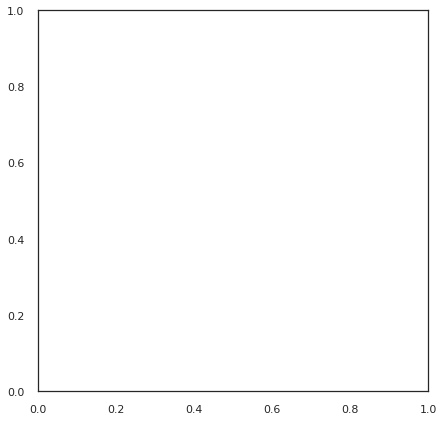

In [ ]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     #label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')
    

In [ ]:
finalDf_2= finalDf[['principal component 1', 'principal component 2']]

In [ ]:
finalDf_2.columns

Index(['principal component 1', 'principal component 2'], dtype='object')

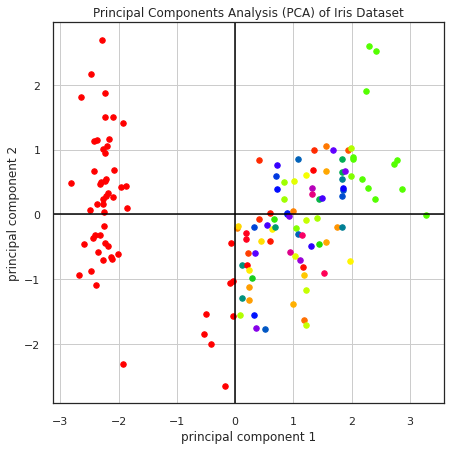

In [ ]:
plotData(finalDf_2, "principal component 1")

## Introduzca una conclusión de los resultados obtenidos

In [ ]:
#CONCLUSION DEL ANALISIS DESARROLLADO:
He aprovechado este entregable para probar las cosas expuestas en el curso
- Tratamiento de outliers
- PCA
- KNN aplicado a clustering







